### Lectura del fichero y sustitución de las ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

### Lectura del fichero y sustitución de las ?

In [2]:
df = pd.read_csv(sys.argv[1],header=None) # Leemos el archivo csv deseado sin cabecera
df.replace('?',np.nan,inplace=True)       # Transformamos los ? en NaN de numpy para las cuentas

### Obtención columnas que son object y posible transformación si lo necesita

In [3]:
# Las columnas que empezaban por ? son consideradas como object de momento así que necesitamos
# ir una por una para ver si contienen números o de verdad son strings

col_obj = df.select_dtypes(include='object').columns # Cogemos las columnas "problemáticas"

In [4]:
# En este bucle vamos columna por columna comprobando si podemos transformarlas a float ya que los 
# NaN sí admiten este cambio. Si la columna en cuestión no admite el cambio es por contener strings.
# Es cierto que si una columna de ints empieza por NaN será cambiada a float, pero para las cuentas
# que hacemos no lo veo un problema. Si nuestra intención es que muestre esos números en pantalla 
# como ints se podrían hacer transformaciones a la hora de printear sin problema
for col in col_obj:
    try:
        df[col] = df[col].astype('float64')
    except ValueError: # Si no admite el cambio la dejamos como está y ya
        df[col] = df[col]

### Función media y moda

In [5]:
def media_moda(df):
    # Función que calculará la media/moda de todo el DataFrame y lo almacenará en una lista que 
    # luego imprimiremos en pantalla de la manera adecuada
    valores = []
    for col in df.columns: # Vamos columna a columna para tenerlo en orden
        if ~df[col].isna().all(): # Comprobación de que no sea un columna vacía
        
            if df[col].dtype != 'object': # Si es numérico 
                valores.append(float("{:.2f}".format(df[col].mean())))
            else:
                valores.append(df[col].mode()[0]) # Nos excluye por defecto los NaN, y si son todos NaN no entraría en el condicional así que no hay problema
        else:
             valores.append('?') # Si es una columna vacía mostramos ? simplemente
    return valores

### Función desviación estándar y número de valores distintos

In [6]:
def std_uniq(df):
    # Misma idea que la anterior pero ahora con la desviación estándar y el número de valores válidos
    # del DataFrame
    valores = []
    for col in df.columns: # Vamos columna a columna para tenerlo en orden
        if ~df[col].isna().all(): # Comprobación de que no sea un columna vacía
        
            if df[col].dtype != 'object': # Si es numérica 
                valores.append(float("{:.2f}".format(df[col].std())))
            else: # Si es categórica sacamos la 
                valores.append(len(df[col].dropna().unique())) # Importante eliminar los NaN al contar
        else:
            valores.append('?')
    return valores

### Función número de valores válidos

In [7]:
def valid(df):
    # El método count() directamente nos da el número de valores válidos en una columna
    valores = []
    for col in df.columns:
        valores.append(df[col].count())
    return valores
    

### Función mínimo o valor que menos aparece

In [8]:
def minim(df):
    valores = []
    for col in df.columns:
        if ~df[col].isna().all(): # Comprobación de que no sea un columna vacía
        
            if df[col].dtype != 'object': # Si es numérico 
                valores.append(df[col].min())
            else:
                # Se me han ocurrido dos formas de sacar este valor, la primera, aunque es más 
                # clara tarda en ejecutarse un 50% más así que nos quedamos con la segunda
                
#               valores.append(min(df[col], key = lambda x: df[col].value_counts()[x]))
                valores.append(df[col].value_counts().index[len(df[col].value_counts())-1])
                # Value counts nos crea otro DataFrame en el que el índice son los valores 
                # y los datos es el número de veces que aparecen, por eso nos quedamos el
                # último elemento del índice ya que viene ordenado de mayor a menor
        else:
            valores.append('?') # Como siempre, si la columna está vacía añadimos ?
    return valores

### Función máximo o valor que más veces aparece

In [9]:
def maxim(df):
    # Igual que la función anterior pero ahora buscando el máximo y ya
    valores = []
    for col in df.columns:
        if ~df[col].isna().all(): # Comprobación de que no sea un columna vacía
        
            if df[col].dtype != 'object': # Si es numérico 
                valores.append(df[col].max())
            else:
#               valores.append(max(df[col], key = lambda x: df[col].value_counts()[x]))
                valores.append(df[col].value_counts().index[0])
                # Ahora nos quedamos con el primer valor del índice
        else:
            valores.append('?')
    return valores

### Gráficas

In [16]:
def graficas(df):
    for col in df.columns:
        if ~df[col].isna().all(): # Comprobación de que no sea un columna vacía
            if df[col].dtype != 'object': # Si es numérico 
                    plt.figure() # Hacemos una figura para cada columna
                    plt.title('Columna '+ str(col))
                    try:
                        df[col].hist(bins=int(df[col].count()/20)) # Si tenemos menos de 20 datos nos va fallar
                    except ValueError:
                        df[col].hist() # En caso de tener menos de 20 lo dejo con los bins por defecto
            else: # Si es categórico
                plt.figure()
                plt.title('Columna '+ str(col))
                df[col].value_counts().plot.pie()
        else:
            print('La columna',col,'no tiene ningún valor válido para hacer una gráfica')
            
# Ejecutando la llamada a esta función en jupyter notebook me funciona sin problemas, al llamarla desde el
# anaconda prompt solo me printea el último mensaje, supongo que porque el shell no puede mostrar las
# gráficas. Aunque sí supongo que podríamos guardar las gráficas con comandos de la forma:
# fig, ax = plt.subplots() y ya hacer ax.plot() lo que sea para tenerlos guardados al menos

### Diccionario para mapear

1.67,2.83,2.75,?,none,38.5
1,2.0,2.5,?,tc,38.0
2,4.0,3.0,?,none,39.0
La columna 3 no tiene ningún valor válido para hacer una gráfica


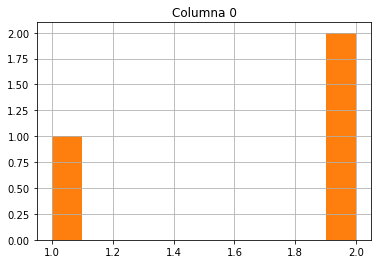

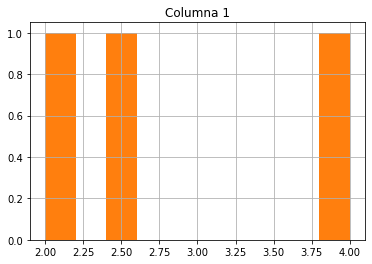

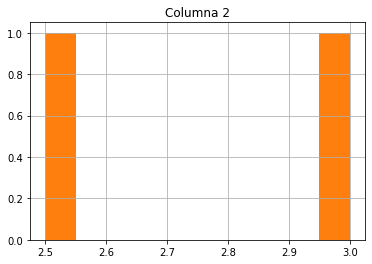

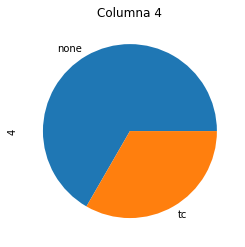

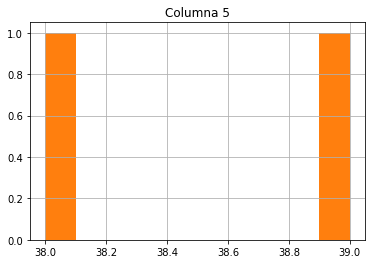

In [17]:
dc = {'p':media_moda,'s':std_uniq,'n':valid,'m':minim,'M':maxim,'P':graficas}
cd = sys.argv[2]

for i in cd:
    try:
        if i != 'P':
            a = dc.get(i)(df)
            for i in range(len(a)):  # Elijo trabajar con el index en vez de con los elementos directamente para poder 
                                 # poner el condicional siguiente. No se me ocurre otra forma para que no salga la    
                    if i != len(a)-1:    # coma al final del print
                        print(a[i],end=',')
                    else:
                        print(a[i])
        else:
            dc.get(i)(df)
    except TypeError:                               
            print('La opcion {} no existe'.format(i))